In [1]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib import style
import mplfinance as mpf
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt

from datetime import date

style.use('ggplot')

In [2]:
start = dt.datetime(2010, 1, 1)
end = date.today()

In [3]:
tsla = web.DataReader('TSLA', 'yahoo', start, end)

In [4]:
tsla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


In [5]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2540 entries, 2010-06-29 to 2020-07-30
Data columns (total 6 columns):
High         2540 non-null float64
Low          2540 non-null float64
Open         2540 non-null float64
Close        2540 non-null float64
Volume       2540 non-null int64
Adj Close    2540 non-null float64
dtypes: float64(5), int64(1)
memory usage: 138.9 KB


In [6]:
tsla.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2540.000000,2540.000000,2540.000000,2540.000000,2.540000e+03,2540.000000
mean,224.434024,215.285795,219.925362,220.020032,6.136112e+06,220.020032
std,206.256964,194.248218,200.379351,200.444105,5.739083e+06,200.444105
min,16.629999,14.980000,16.139999,15.800000,1.185000e+05,15.800000
25%,35.875000,34.599998,35.257499,35.182499,2.047700e+06,35.182499
50%,222.189995,215.000000,218.764999,218.620003,4.820850e+06,218.620003
75%,292.794998,281.570000,286.592491,287.892502,7.938725e+06,287.892502
max,1794.989990,1562.000000,1678.949951,1643.000000,6.093880e+07,1643.000000


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


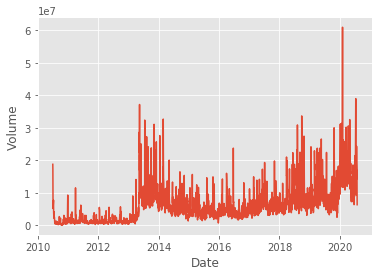

In [7]:
sns.lineplot(x=tsla.index, y='Volume', data=tsla)

In [8]:
tsla['50ma'] = tsla['Adj Close'].rolling(window=50, min_periods=0).mean()
tsla.head()

,High,Low,Open,Close,Volume,Adj Close,50ma
Date,,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000,23.860000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999,23.226666
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001,22.220000
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001,20.998000


In [9]:
tsla_10day_volume = tsla['Volume'].resample('10D').sum().reset_index()
tsla_1y_ohlc = tsla['Adj Close'].resample('1Y').ohlc()

tsla_1y_ohlc.head()

,open,high,low,close
Date,,,,
2010-12-31,23.889999,35.470001,15.800000,26.629999
2011-12-31,26.620001,34.939999,21.830000,28.559999
2012-12-31,28.080000,38.009998,22.790001,33.869999
2013-12-31,35.360001,193.369995,32.910000,150.429993
2014-12-31,150.100006,286.040009,139.339996,222.410004


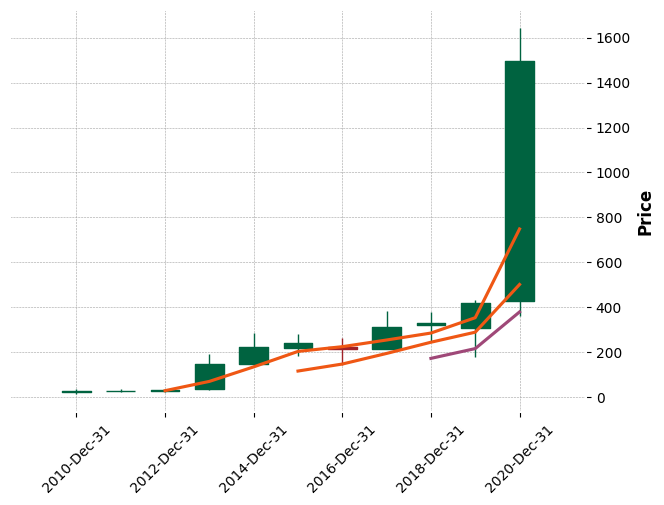

In [10]:
mpf.plot(tsla_1y_ohlc, type='candle', style='charles', mav=(3,6,9))

In [11]:
from bs4 import BeautifulSoup
import requests
import os

In [12]:
def pull_stock_tickers(url):
    respData = requests.get(url)
    soup = BeautifulSoup(respData.text, 'html.parser')
    table = soup.find('table', attrs={'id': 'tablepress-2962'})
    name_and_links = table.find_all('b')

    tickers = []

    for i in range(len(name_and_links)):
        tickers.append(name_and_links[i].text)

    return tickers

In [13]:
url = 'https://topforeignstocks.com/stock-lists/the-complete-list-of-auto-manufacturing-stocks-trading-on-the-nyse/'

In [18]:
def stock_data_to_csv(url):
    tickers = pull_stock_tickers(url)
    
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    
    start = dt.datetime(2010, 1, 1)
    end = date.today()
    
    for ticker in tickers:
        print(ticker)
        
        if not os.path.exists('stock_dfs/{}'.format(ticker)):
            df = web.DataReader(ticker, 'yahoo', start, end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
            
        else:
            print('Already have {}'.format(ticker))

In [19]:
stock_data_to_csv(url)

RACE
FCAU
F
GM
HMC
NIO
TTM
TM


In [10]:
tsla_monthly_adjc = tsla['Adj Close'].resample('1M').mean().reset_index()
tsla_monthly_adjc.set_index('Date', inplace=True)

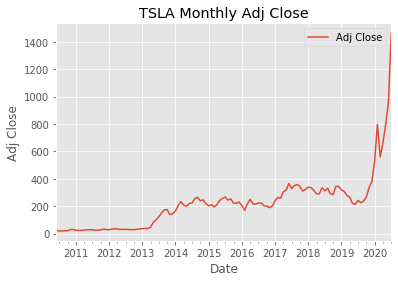

In [11]:
tsla_monthly_adjc.plot()
plt.title('TSLA Monthly Adj Close')
plt.ylabel('Adj Close')
plt.show()

In [12]:
def preprocess_rolling_average(df):

    monthly_rolling_average = df['Adj Close'].rolling(window=12).mean().reset_index().set_index('Date')
    
    monthly_std = df['Adj Close'].rolling(window=12).std().reset_index().set_index('Date')
    
    return monthly_rolling_average, monthly_std

In [13]:
tsla_mra, tsla_stdra = preprocess_rolling_average(tsla_monthly_adjc)
tsla_mra.dropna(inplace=True)
tsla_stdra.dropna(inplace=True)

In [14]:
def plotting_(df, df_mra, df_stdra, title=None, ylabel=None):
    plt.plot(df.index, df, label='Original')
    plt.plot(df_mra.index, df_mra, color='black', label='rolling_mean', ls='--')
    plt.plot(df_stdra.index, df_stdra, color='green', ls='--', label='rolling_std')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.legend()
    
    plt.show()

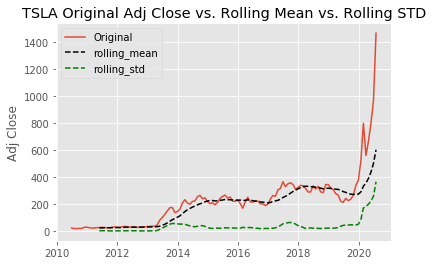

In [15]:
plotting_(tsla_monthly_adjc, tsla_mra, tsla_stdra, title='TSLA Original Adj Close vs. Rolling Mean vs. Rolling STD',
         ylabel='Adj Close')

In [16]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(df):
    test = adfuller(df['Adj Close'], autolag='AIC')
    
    output = pd.Series(test[0:4], index=['Test Statistic', 'p-value', '# Lags Used', '# of Observations Used'])
    for key, value in test[4].items():
        output['Critical Value (%s)' % (key)] = value
        
    print(output)

In [17]:
adfuller_test(tsla_monthly_adjc)

Test Statistic              1.391419
p-value                     0.997075
# Lags Used                 5.000000
# of Observations Used    116.000000
Critical Value (1%)        -3.488022
Critical Value (5%)        -2.886797
Critical Value (10%)       -2.580241
dtype: float64


In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(tsla_monthly_adjc)

trend = decomposition.trend
seasonal = decomposition.seasonal
resid = decomposition.resid

In [19]:
def plot_tsr(data):
    decomposition = seasonal_decompose(data)

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    resid = decomposition.resid
    
    plt.subplot(411)
    plt.plot(data)
    plt.title('Original')
    plt.show()
    
    plt.subplot(412)
    plt.plot(trend)
    plt.title('Trend')
    plt.show()
    
    plt.subplot(413)
    plt.plot(seasonal)
    plt.title('Seasonality')
    plt.show()
    
    plt.subplot(414)
    plt.plot(resid)
    plt.title('Residuals')
    plt.show()
    

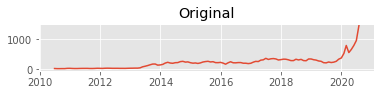

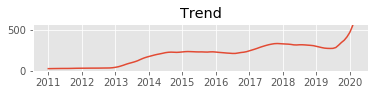

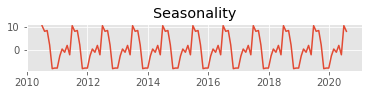

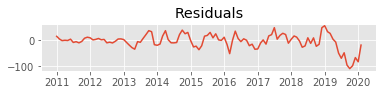

In [20]:
plot_tsr(tsla_monthly_adjc)

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_pacf(data, lags=None, stock=''):
    plot_acf(data, lags=lags, title=stock + ' ACF Plot')
    
    plot_pacf(data, lags=lags, title=stock + ' PACF Plot')

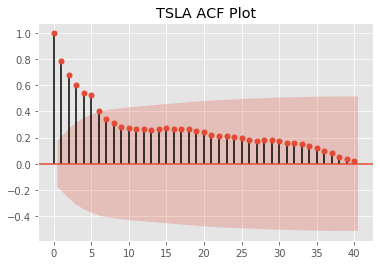

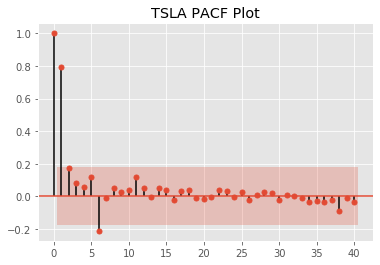

In [22]:
plot_acf_pacf(tsla_monthly_adjc, lags=40, stock='TSLA')

In [23]:
tsla_diff = tsla_monthly_adjc.diff(periods=1)
tsla_diff.dropna(axis=0, inplace=True)

Test Statistic              0.597521
p-value                     0.987554
# Lags Used                 4.000000
# of Observations Used    116.000000
Critical Value (1%)        -3.488022
Critical Value (5%)        -2.886797
Critical Value (10%)       -2.580241
dtype: float64


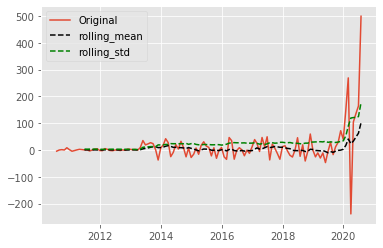

In [24]:
tsla_diff_mra, tsla_diff_stdra = preprocess_rolling_average(tsla_diff)

adfuller_test(tsla_diff)
plotting_(tsla_diff, tsla_diff_mra, tsla_diff_stdra)

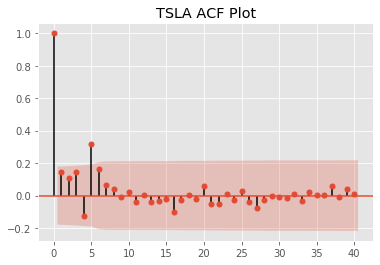

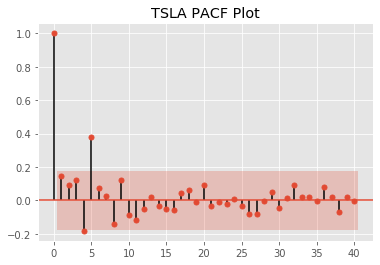

In [25]:
plot_acf_pacf(tsla_diff, lags=40, stock='TSLA')

Test Statistic             -0.493903
p-value                     0.893201
# Lags Used                 8.000000
# of Observations Used    101.000000
Critical Value (1%)        -3.496818
Critical Value (5%)        -2.890611
Critical Value (10%)       -2.582277
dtype: float64


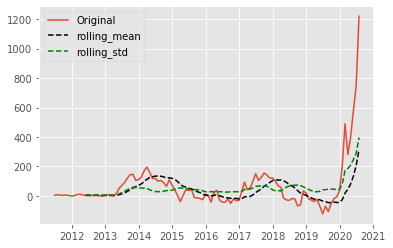

In [26]:
tsla_diff_12 = tsla_monthly_adjc.diff(periods=12)
tsla_diff_12.dropna(axis=0, inplace=True)

tsla_diff_12_mra, tsla_diff_12_stdra = preprocess_rolling_average(tsla_diff_12)

adfuller_test(tsla_diff_12)
plotting_(tsla_diff_12, tsla_diff_12_mra, tsla_diff_12_stdra)

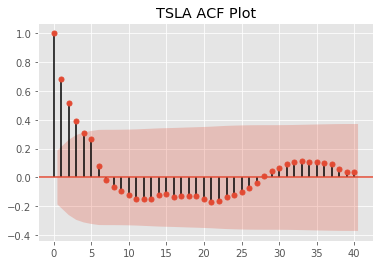

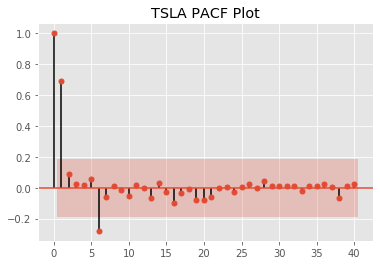

In [27]:
plot_acf_pacf(tsla_diff_12, lags=40, stock='TSLA')

Test Statistic             -0.493903
p-value                     0.893201
# Lags Used                 8.000000
# of Observations Used    101.000000
Critical Value (1%)        -3.496818
Critical Value (5%)        -2.890611
Critical Value (10%)       -2.582277
dtype: float64


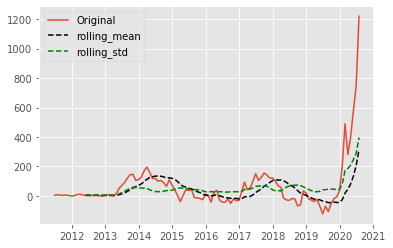

In [28]:
tsla_diff_365 = tsla_monthly_adjc.diff(periods=12)
tsla_diff_12.dropna(axis=0, inplace=True)

tsla_diff_12_mra, tsla_diff_12_stdra = preprocess_rolling_average(tsla_diff_12)

adfuller_test(tsla_diff_12)
plotting_(tsla_diff_12, tsla_diff_12_mra, tsla_diff_12_stdra)

## Taking the Log of Adj Close Prices

Test Statistic           -8.461256e+00
p-value                   1.565092e-13
# Lags Used               0.000000e+00
# of Observations Used    1.200000e+02
Critical Value (1%)      -3.486056e+00
Critical Value (5%)      -2.885943e+00
Critical Value (10%)     -2.579785e+00
dtype: float64


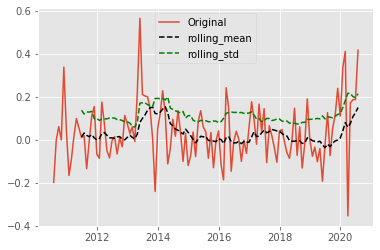

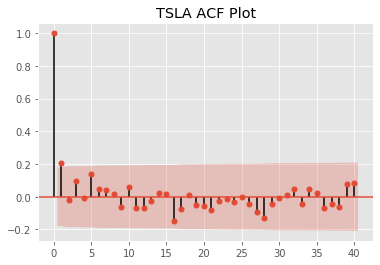

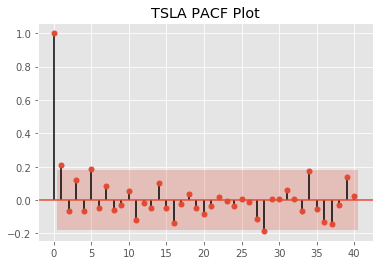

In [29]:
import numpy as np

tsla_log = np.log(tsla_monthly_adjc)

tsla_log_diff_1 = tsla_log.diff(periods=1).dropna(axis=0)

tsla_log_mra, tsla_log_stdra = preprocess_rolling_average(tsla_log_diff_1)

adfuller_test(tsla_log_diff_1)
plotting_(tsla_log_diff_1, tsla_log_mra, tsla_log_stdra)
plot_acf_pacf(tsla_log_diff_1, lags=40, stock='TSLA')

## Squaring Adj Close Prices

Test Statistic              4.905684
p-value                     1.000000
# Lags Used                 6.000000
# of Observations Used    114.000000
Critical Value (1%)        -3.489058
Critical Value (5%)        -2.887246
Critical Value (10%)       -2.580481
dtype: float64


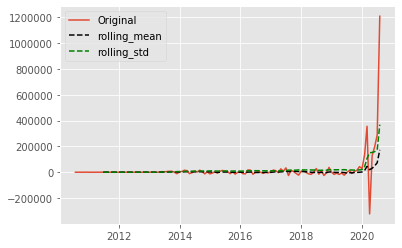

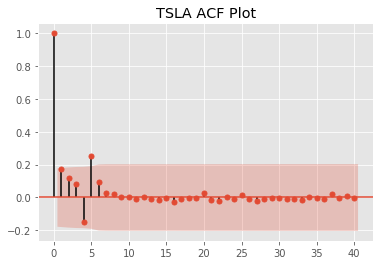

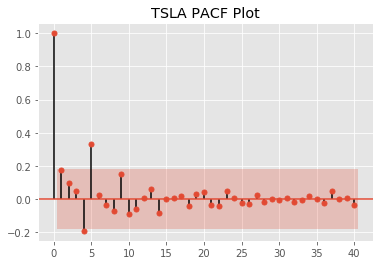

In [30]:
tsla_squared = tsla_monthly_adjc ** 2
tsla_squared_diff_1 = tsla_squared.diff(periods=1).dropna(axis=0)

tsla_squared_mra, tsla_squared_stdra = preprocess_rolling_average(tsla_squared_diff_1)

adfuller_test(tsla_squared_diff_1)
plotting_(tsla_squared_diff_1, tsla_squared_mra, tsla_squared_stdra)
plot_acf_pacf(tsla_squared_diff_1, lags=40, stock='TSLA')

## Taking Square Root of Adj Close Prices

Test Statistic             -1.562877
p-value                     0.502210
# Lags Used                 4.000000
# of Observations Used    116.000000
Critical Value (1%)        -3.488022
Critical Value (5%)        -2.886797
Critical Value (10%)       -2.580241
dtype: float64


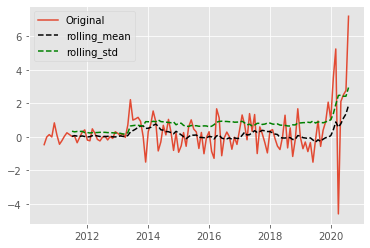

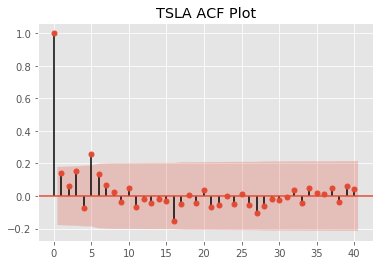

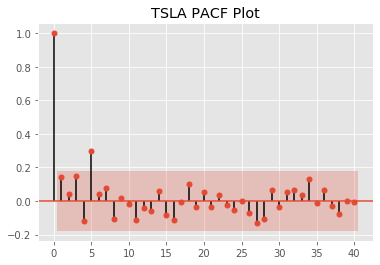

In [31]:
tsla_sqrt = tsla_monthly_adjc ** 0.5
tsla_sqrt_diff_1 = tsla_sqrt.diff(periods=1).dropna(axis=0)

tsla_cubed_mra, tsla_cubed_stdra = preprocess_rolling_average(tsla_sqrt_diff_1)

adfuller_test(tsla_sqrt_diff_1)
plotting_(tsla_sqrt_diff_1, tsla_cubed_mra, tsla_cubed_stdra)
plot_acf_pacf(tsla_sqrt_diff_1, lags=40, stock='TSLA')

## Building AMIRA Model

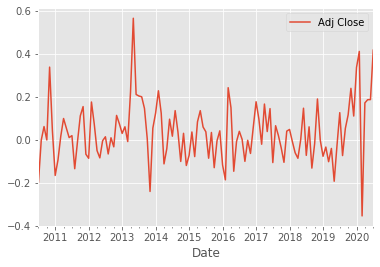

In [32]:
tsla_log_diff_1.plot()

In [81]:
from statsmodels.tsa.arima_model import ARIMA
import itertools

In [ ]:
X = tsla_log.values
train = X[0:114]
test = X[114:]

In [ ]:
plt.plot(tsla_log)

In [105]:
p=d=q = range(0, 13)

pdq = list(itertools.product(p, d, q))

In [ ]:
import warnings
warnings.filterwarnings('ignore')
aic_scores = []

for i, param in enumerate(pdq):
    try:
        model = ARIMA(train, order=param)
        model_fit = model.fit()
        aic_scores.append(model_fit.aic)
    except:
        continue

In [86]:
aic_scores.index(min(aic_scores))

0

In [87]:
pdq[0]

(1, 1, 1)

In [102]:
model = ARIMA(train, order=(12, 1, 1))

model_fit = model.fit()

In [103]:
predictions = model_fit.forecast(steps=7)[0]
predictions

array([5.92446563, 5.91847863, 5.96011507, 6.01379165, 6.01637708,
       6.09228392, 6.07948465])

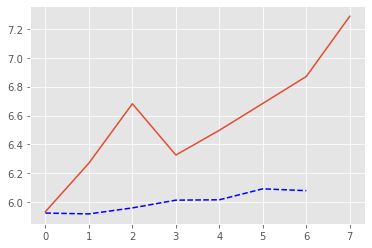

In [104]:
#plt.plot(train)
plt.plot(test)
plt.plot(predictions, color='blue', ls='--')

In [56]:
print(model_fit.summary())
print(model_fit.params)

                              ARMA Model Results                              
Dep. Variable:              Adj Close   No. Observations:                   97
Model:                     ARMA(1, 1)   Log Likelihood                  72.503
Method:                       css-mle   S.D. of innovations              0.114
Date:                Thu, 30 Jul 2020   AIC                           -137.006
Time:                        14:47:25   BIC                           -126.707
Sample:                    07-31-2010   HQIC                          -132.842
                         - 07-31-2018                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0256      0.015      1.741      0.085      -0.003       0.054
ar.L1.Adj Close    -0.2309      0.236     -0.976      0.331      -0.694       0.233
ma.L1.Adj Close     0.5591      

In [74]:
len(test)

13